In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import sys

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows',497)
pd.set_option('display.max_colwidth', -1)
np.set_printoptions(threshold= sys.maxsize)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


### Loading the Dataset into Dataframe

In [3]:
data=pd.read_csv("dataset_Facebook.csv",delimiter = ';')

In [4]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.000000,2752,5091,178,109,159,3078,1640,119,4,79.000000,17.000000,100
1,139441,Status,2,12,3,10,0.000000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.000000,29.000000,164
2,139441,Photo,3,12,3,3,0.000000,2413,4373,177,113,154,2812,1503,132,0,66.000000,14.000000,80
3,139441,Photo,2,12,2,10,1.000000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.000000,147.000000,1777
4,139441,Photo,2,12,2,3,0.000000,7244,13594,671,410,580,6228,3200,396,19,325.000000,49.000000,393


##Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [6]:
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.360000,29585.948000,920.344000,798.772000,1415.130000,16766.376000,6585.488000,609.986000,7.482000,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.787890,76803.246670,985.016636,882.505013,2000.594118,59791.023731,7682.009405,612.725618,21.180910,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,570.000000,9.000000,9.000000,9.000000,567.000000,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.000000,5694.750000,393.750000,332.500000,509.250000,3969.750000,2181.500000,291.000000,1.000000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.000000,9051.000000,625.500000,551.500000,851.000000,6255.500000,3417.000000,412.000000,3.000000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.000000,22085.500000,1062.000000,955.500000,1463.000000,14860.500000,7989.000000,656.250000,7.000000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1110282.000000,11452.000000,11328.000000,19779.000000,1107833.000000,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


We can see that there are Missing Values in the Paid, Like and Share attributes.<br>
By looking at this attributes, Missing Values can be replaced by 0.

In [7]:
data.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [8]:
data.fillna(0,inplace=True)

In [9]:
data['Type'] = data["Type"].astype(str)
data['Category'] = data["Category"].astype(str)
data['Post Hour'] = data["Post Hour"].astype(int)
data['Post Weekday'] = data["Post Weekday"].astype(int)
data['Post Month'] = data["Post Month"].astype(int)
data['Paid'] = data["Paid"].astype(int)
data['like'] = data["like"].astype(int)
data['share'] = data["share"].astype(int)

### Adding New Metrics

In [10]:
data["Reach_Rate"]=(data["Lifetime Post Total Reach"]/data['Lifetime Post Total Impressions'])*100
data["Reach_Rate_by_liked_users"]=(data["Lifetime Post reach by people who like your Page"]/data['Lifetime Post Impressions by people who have liked your Page'])*100
data["Engage_Rate"]=(data["Lifetime Engaged Users"]/data['Lifetime Post Total Reach'])*100
data["Engage_Rate_by_liked_users"]=(data["Lifetime People who have liked your Page and engaged with your post"]/data['Lifetime Post reach by people who like your Page'])*100
data["Consumer_Rate"]=(data["Lifetime Post Consumers"]/data['Lifetime Post Total Reach'])*100
data["Consumption_Rate"]=(data["Lifetime Post Consumptions"]/data['Lifetime Post Total Reach'])*100
data["Avg_Consumption_Rate"]=(data["Lifetime Post Consumptions"]/data['Lifetime Post Consumers'])
data["Impressions_100"]=data['Lifetime Post Total Impressions']/100
data["Impression_rate_by_liked"]=(data["Lifetime Post Impressions by people who have liked your Page"]/data["Page total likes"])*100

In [11]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Reach_Rate,Reach_Rate_by_liked_users,Engage_Rate,Engage_Rate_by_liked_users,Consumer_Rate,Consumption_Rate,Avg_Consumption_Rate,Impressions_100,Impression_rate_by_liked
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,54.056178,53.281352,6.468023,7.256098,3.960756,5.777616,1.458716,50.910000,2.207385
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,54.887968,52.194705,13.929254,18.128272,13.011472,16.003824,1.229978,190.570000,8.397817
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,55.179511,53.449502,7.335267,8.782435,4.682967,6.382097,1.362832,43.730000,2.016624
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,56.969463,52.514461,4.410709,4.324763,1.575966,2.232285,1.416456,879.910000,43.765464
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,53.288215,51.380861,9.262838,12.375000,5.659856,8.006626,1.414634,135.940000,4.466405


In [12]:
data.describe()

,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Reach_Rate,Reach_Rate_by_liked_users,Engage_Rate,Engage_Rate_by_liked_users,Consumer_Rate,Consumption_Rate,Avg_Consumption_Rate,Impressions_100,Impression_rate_by_liked
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,7.038000,4.150000,7.840000,0.278000,13903.360000,29585.948000,920.344000,798.772000,1415.130000,16766.376000,6585.488000,609.986000,7.482000,177.590000,27.048000,212.120000,60.455057,53.984014,12.433945,12.723418,11.155276,20.952363,1.782939,295.859480,14.585329
std,16272.813214,3.307936,2.030701,4.368589,0.448462,22740.787890,76803.246670,985.016636,882.505013,2000.594118,59791.023731,7682.009405,612.725618,21.180910,323.172528,42.511742,380.233118,50.397975,8.208514,8.111256,7.149375,8.122808,34.411917,1.783750,768.032467,58.864877
min,81370.000000,1.000000,1.000000,1.000000,0.000000,238.000000,570.000000,9.000000,9.000000,9.000000,567.000000,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000,4.470216,4.366001,0.487805,0.892857,0.487805,0.487805,1.000000,5.700000,0.555273
25%,112676.000000,4.000000,2.000000,3.000000,0.000000,3315.000000,5694.750000,393.750000,332.500000,509.250000,3969.750000,2181.500000,291.000000,1.000000,56.000000,10.000000,71.000000,53.321841,51.452423,6.410095,7.652516,4.591794,6.725430,1.321983,56.947500,3.116424
50%,129600.000000,7.000000,4.000000,9.000000,0.000000,5281.000000,9051.000000,625.500000,551.500000,851.000000,6255.500000,3417.000000,412.000000,3.000000,101.000000,19.000000,123.500000,56.780146,55.096836,12.171691,12.377055,10.228819,16.167787,1.436826,90.510000,5.618916
75%,136393.000000,10.000000,6.000000,11.000000,1.000000,13168.000000,22085.500000,1062.000000,955.500000,1463.000000,14860.500000,7989.000000,656.250000,7.000000,187.250000,32.000000,228.500000,60.133848,58.011839,16.262911,16.105351,14.973965,21.642785,1.589802,220.855000,12.022967
max,139441.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1110282.000000,11452.000000,11328.000000,19779.000000,1107833.000000,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000,790.633609,73.219948,60.084034,49.857955,59.663866,350.420168,20.885956,11102.820000,1064.507543


We can see the Max Reach is more than 100%

This may be an anomoly or those posts may have Viral Reach.


In [13]:
data[data["Reach_Rate"]>100]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Reach_Rate,Reach_Rate_by_liked_users,Engage_Rate,Engage_Rate_by_liked_users,Consumer_Rate,Consumption_Rate,Avg_Consumption_Rate,Impressions_100,Impression_rate_by_liked
476,86909,Photo,1,1,6,10,1,37088,10966,2728,2288,3183,66311,34352,2021,7,579,47,633,338.209010,51.804376,7.355479,5.883209,6.169111,8.582291,1.391171,109.660000,76.299348
477,86909,Link,1,1,6,4,0,39600,7927,572,496,581,12522,8176,167,1,101,5,107,499.558471,65.293084,1.444444,2.042564,1.252525,1.467172,1.171371,79.270000,14.408174
482,86491,Photo,3,1,3,10,0,66784,9456,2969,2833,3645,17809,11328,801,3,187,36,226,706.260575,63.608288,4.445676,7.070975,4.242034,5.457894,1.286622,94.560000,20.590582
492,85979,Link,1,1,5,11,0,45920,5808,753,655,763,15766,10720,220,0,128,9,137,790.633609,67.994418,1.639808,2.052239,1.426394,1.661585,1.164885,58.080000,18.337036


Removing those posts from the data

In [14]:
data=data[data["Reach_Rate"]<100]


### Exploratory Data Analysis

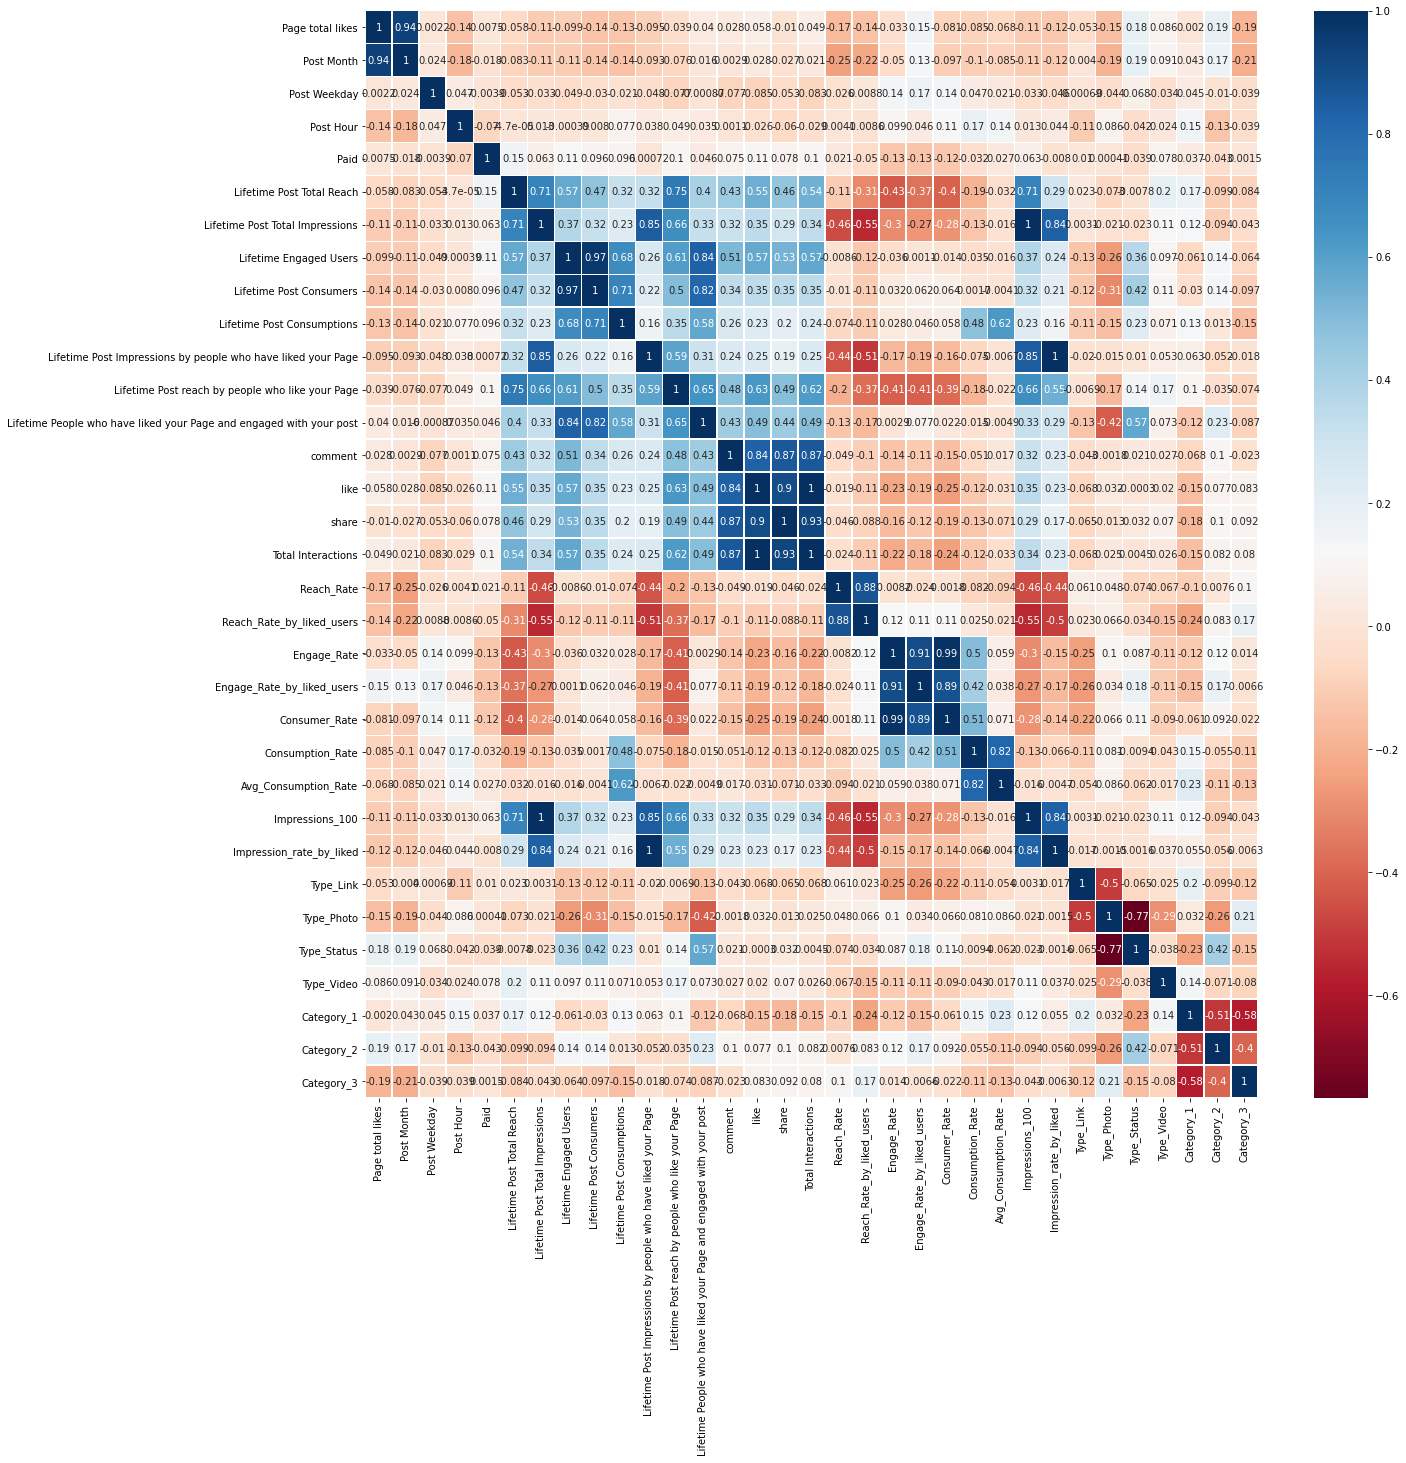

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(data).corr(),annot=True, linewidths=.5, cmap='RdBu')

### Number of Posts in Month, Hour, Day

Text(0.5, 0, 'Hour')

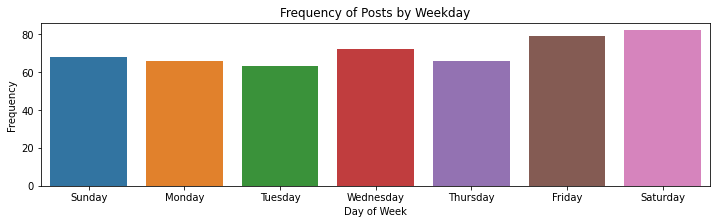

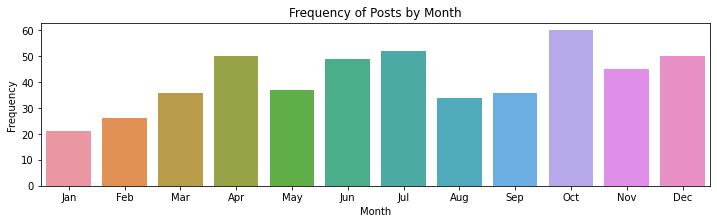

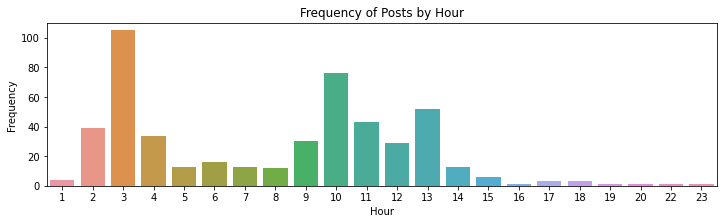

In [16]:
f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.countplot(data['Post Weekday'])
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Frequency of Posts by Weekday")
ax.set_ylabel("Frequency")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.countplot(data['Post Month'])
handles = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",'Jul', "Aug", "Sep", "Oct",'Nov', "Dec"]
labels = [0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(labels, handles)
plt.title("Frequency of Posts by Month")
ax.set_ylabel("Frequency")
ax.set_xlabel("Month")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.countplot(data['Post Hour'])
plt.title("Frequency of Posts by Hour")
ax.set_ylabel("Frequency")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Day of Week')

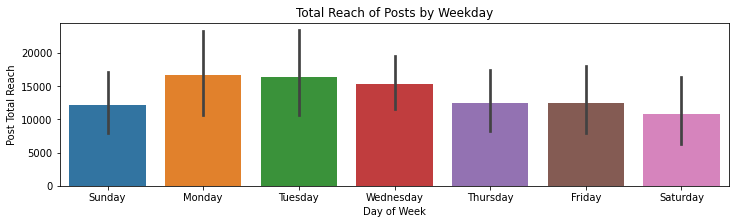

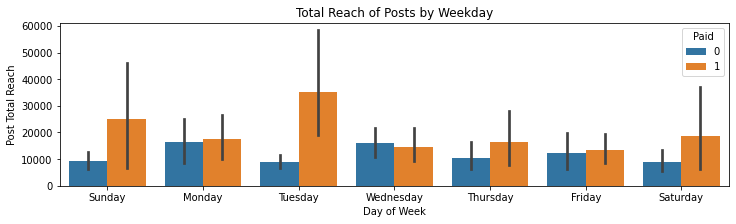

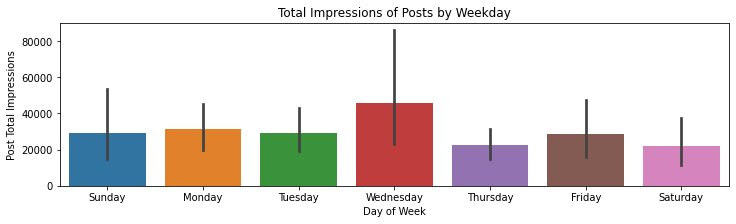

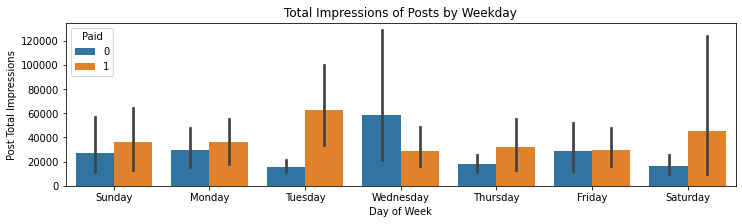

In [17]:

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Lifetime Post Total Reach" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Reach of Posts by Weekday")
ax.set_ylabel("Post Total Reach")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Lifetime Post Total Reach" , data=data, hue="Paid")
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Reach of Posts by Weekday")
ax.set_ylabel("Post Total Reach")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Lifetime Post Total Impressions" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Impressions of Posts by Weekday")
ax.set_ylabel("Post Total Impressions")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Lifetime Post Total Impressions" , data=data, hue="Paid")
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Impressions of Posts by Weekday")
ax.set_ylabel("Post Total Impressions")
ax.set_xlabel("Day of Week")

Text(0.5, 0, 'Day of Week')

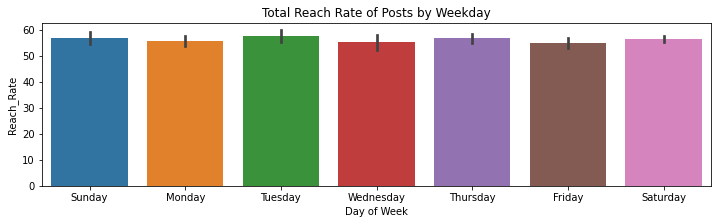

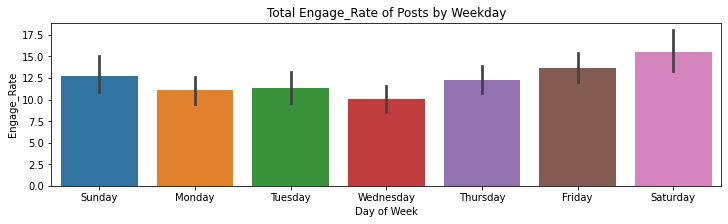

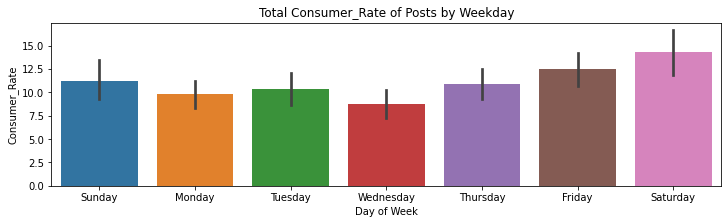

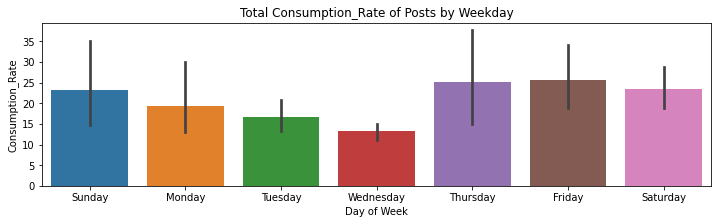

In [18]:
f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Reach_Rate" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Reach Rate of Posts by Weekday")
ax.set_ylabel("Reach_Rate")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Engage_Rate" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Engage_Rate of Posts by Weekday")
ax.set_ylabel("Engage_Rate")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Consumer_Rate" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Consumer_Rate of Posts by Weekday")
ax.set_ylabel("Consumer_Rate")
ax.set_xlabel("Day of Week")

f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Consumption_Rate" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Consumption_Rate of Posts by Weekday")
ax.set_ylabel("Consumption_Rate")
ax.set_xlabel("Day of Week")

From the above plot we can observe:<br>
1) Friday, Saturday and Sunday has more engagement rate<br>
2) Thursday and Friday has more consumption rate<br>

Text(0.5, 0, 'Day of Week')

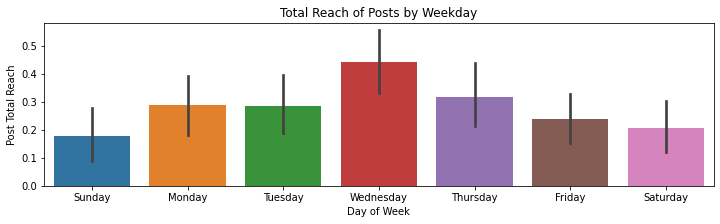

In [19]:
f, ax = plt.subplots()
f.set_size_inches(12, 3)
sns.barplot(x='Post Weekday', y = "Paid" , data=data)
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Total Reach of Posts by Weekday")
ax.set_ylabel("Post Total Reach")
ax.set_xlabel("Day of Week")


## Does the Post Interactions increase as the total page like increases?

Text(0.5, 1.0, 'Page Likes vs Total Interactions')

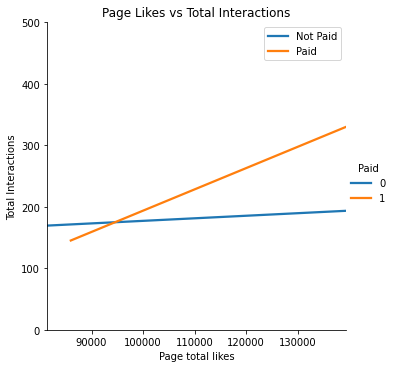

In [20]:
sns.lmplot(x='Page total likes',y='Total Interactions',
           hue='Paid',data=data,fit_reg=True,
          scatter=False,ci=None)
l=plt.legend()
l.get_texts()[0].set_text('Not Paid')
l.get_texts()[1].set_text('Paid')
plt.ylim(0,500)
plt.ylabel("Total Interactions")
plt.title('Page Likes vs Total Interactions')

We can observe that there is a linear trend for paid posts but no noticeable change in unpaid posts.

Text(0.5, 1.0, 'Average Engagement Rate vs Post Time')

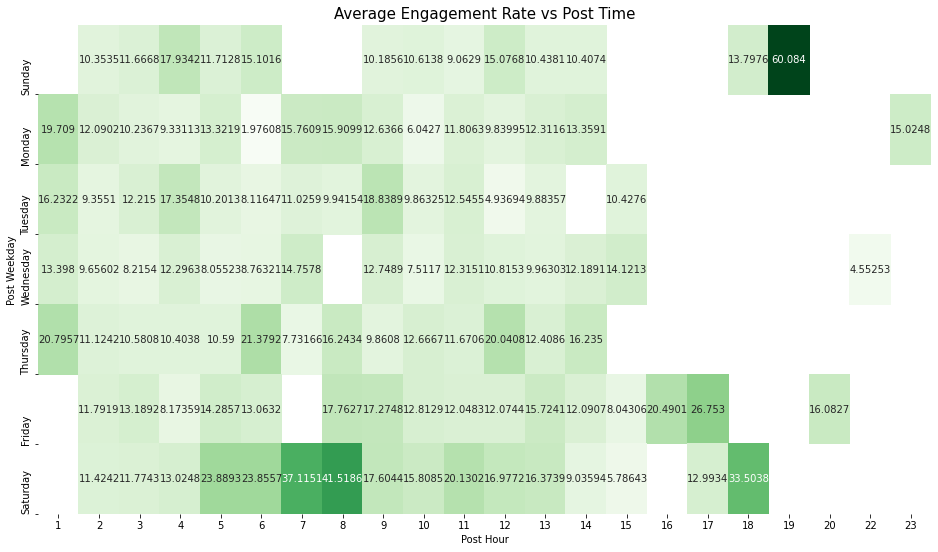

In [21]:
timemap=pd.pivot_table(data,aggfunc='mean',columns='Post Hour',index='Post Weekday',values='Engage_Rate')
plt.figure(figsize=(16,9))
sns.heatmap(timemap,cbar=False,annot=True,cmap='Greens', fmt='g')
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
plt.yticks(np.arange(1,8),handles,va="bottom")
plt.title('Average Engagement Rate vs Post Time',fontsize=15)

Text(0.5, 1.0, 'Average Reach Rate vs Post Time')

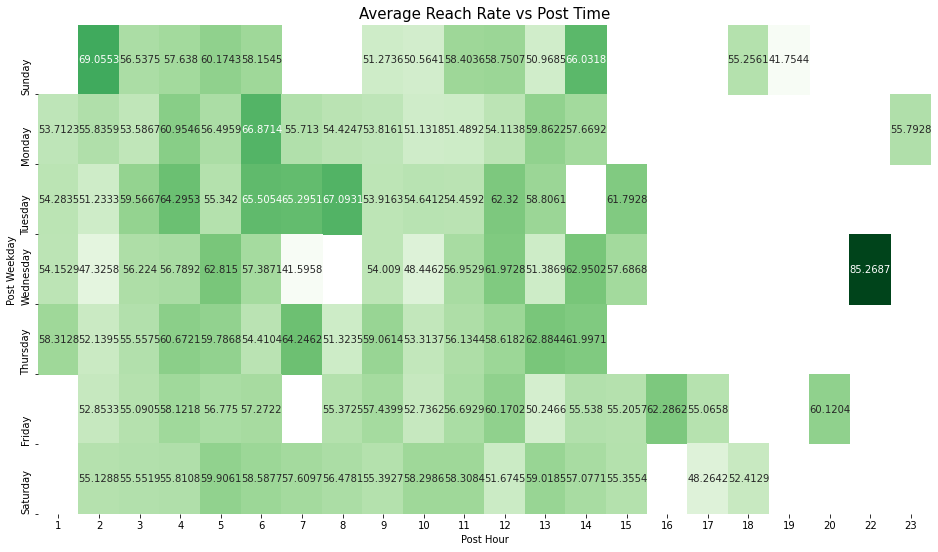

In [22]:
timemap=pd.pivot_table(data,aggfunc='mean',columns='Post Hour',index='Post Weekday',values='Reach_Rate')
plt.figure(figsize=(16,9))
sns.heatmap(timemap,cbar=False,annot=True,cmap='Greens', fmt='g')
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
plt.yticks(np.arange(1,8),handles,va="bottom")
plt.title('Average Reach Rate vs Post Time',fontsize=15)

Text(0.5, 1.0, 'Average Consumer Rate vs Post Time')

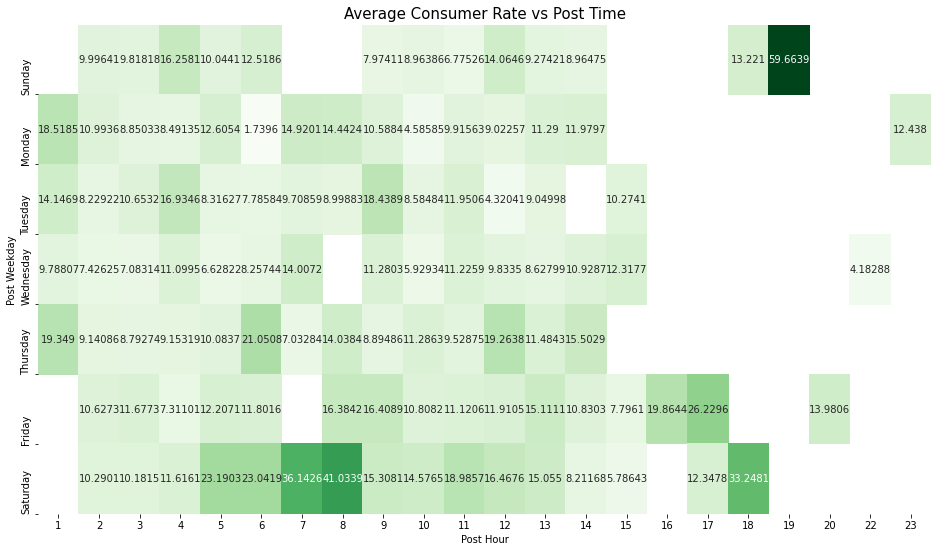

In [23]:
timemap=pd.pivot_table(data,aggfunc='mean',columns='Post Hour',index='Post Weekday',values='Consumer_Rate')
plt.figure(figsize=(16,9))
sns.heatmap(timemap,cbar=False,annot=True,cmap='Greens', fmt='g')
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
plt.yticks(np.arange(1,8),handles,va="bottom")
plt.title('Average Consumer Rate vs Post Time',fontsize=15)

Text(0.5, 1.0, 'Average Consumption Rate vs Post Time')

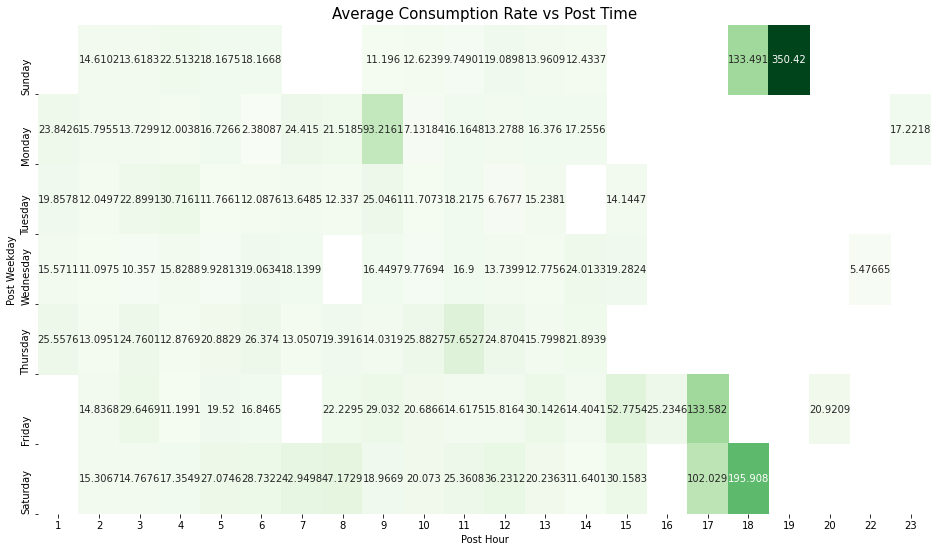

In [24]:
timemap=pd.pivot_table(data,aggfunc='mean',columns='Post Hour',index='Post Weekday',values='Consumption_Rate')
plt.figure(figsize=(16,9))
sns.heatmap(timemap,cbar=False,annot=True,cmap='Greens', fmt='g')
handles = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday']
plt.yticks(np.arange(1,8),handles,va="bottom")
plt.title('Average Consumption Rate vs Post Time',fontsize=15)

## From the above Heat Maps, we can see that these metrics makes sense, and are giving key insights about the post. 

# It can be seen that the posts are performing well and reaching more number of people with more engagement on the Weekends. 

# On Saturday Night, all the metrics were high.

Text(0, 0.5, 'Consumption Rate')

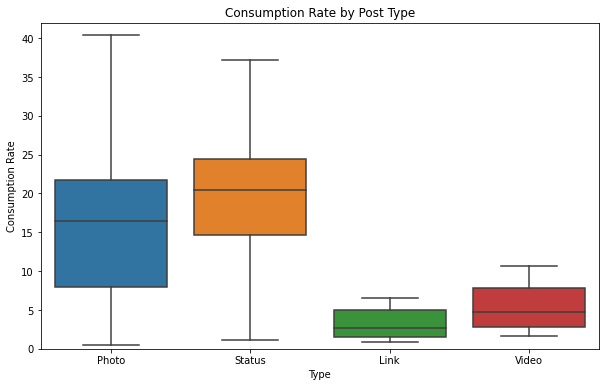

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='Consumption_Rate',data=data,showfliers=False)
plt.ylim(0,42)
plt.title("Consumption Rate by Post Type")

plt.ylabel("Consumption Rate")

Text(0, 0.5, 'Consumer Rate')

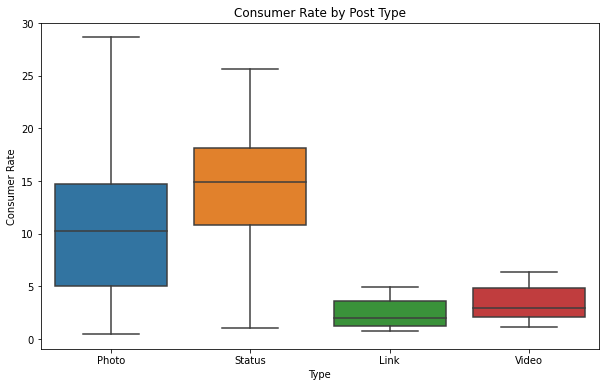

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='Consumer_Rate',data=data, showfliers=False)
plt.title("Consumer Rate by Post Type")
plt.ylabel("Consumer Rate")

Text(0, 0.5, 'Enagagement Rate')

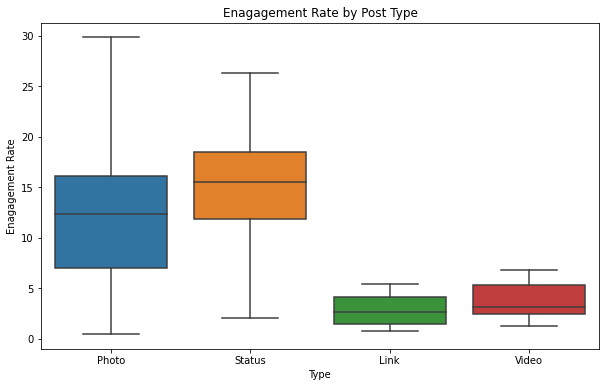

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='Engage_Rate',data=data,showfliers=False)
plt.title("Enagagement Rate by Post Type")
plt.ylabel("Enagagement Rate")

Text(0, 0.5, 'Reach Rate')

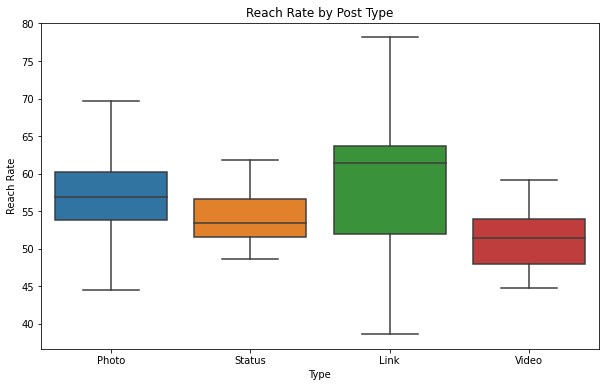

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='Reach_Rate',data=data,showfliers=False)
plt.title("Reach Rate by Post Type")
plt.ylabel("Reach Rate")

Text(0, 0.5, 'Engagement Rate')

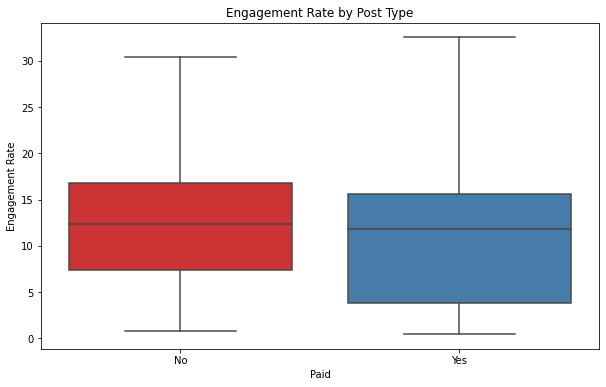

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid',y='Engage_Rate',data=data, showfliers=False, palette='Set1')
plt.xticks(np.arange(0,2),["No", "Yes"])
plt.title("Engagement Rate by Post Type")
plt.ylabel("Engagement Rate")

Text(0, 0.5, 'Reach Rate')

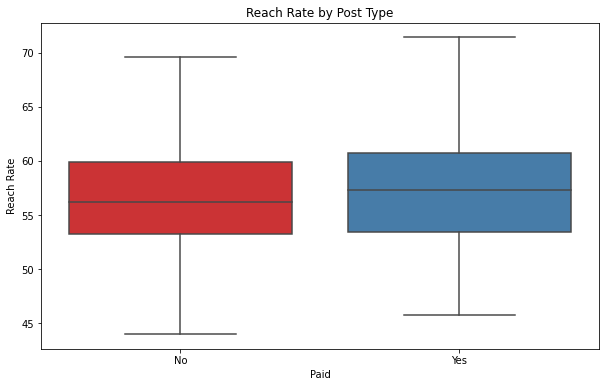

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid',y='Reach_Rate',data=data, showfliers=False, palette='Set1')
plt.xticks(np.arange(0,2),["No", "Yes"])
plt.title("Reach Rate by Post Type")
plt.ylabel("Reach Rate")

Text(0, 0.5, 'Consumption Rate')

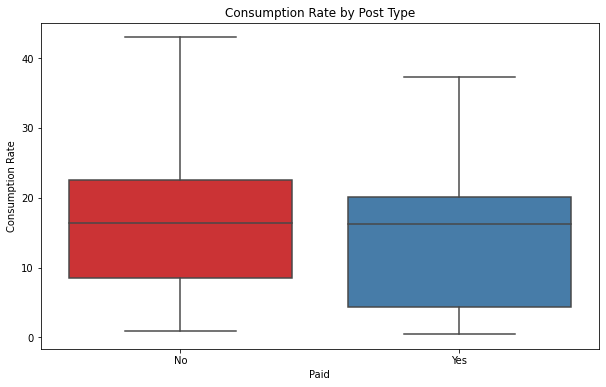

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid',y='Consumption_Rate',data=data, showfliers=False, palette='Set1')
plt.xticks(np.arange(0,2),["No", "Yes"])
plt.title("Consumption Rate by Post Type")
plt.ylabel("Consumption Rate")

Text(0.5, 1.0, 'Engagement Rate vs Category')

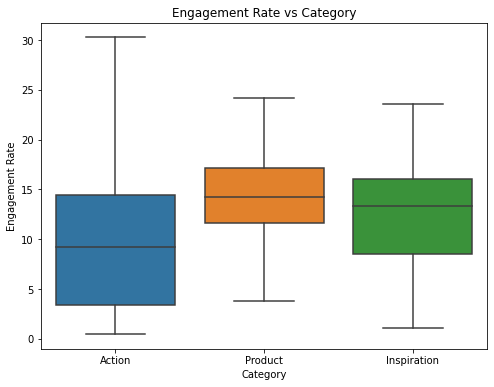

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Engage_Rate',data=data,showfliers=False)
plt.ylabel("Engagement Rate")
plt.xticks(np.arange(0,3),[ "Action", "Product",  "Inspiration" ])
plt.title("Engagement Rate vs Category")

Text(0.5, 1.0, 'Consumption_Rate vs Category')

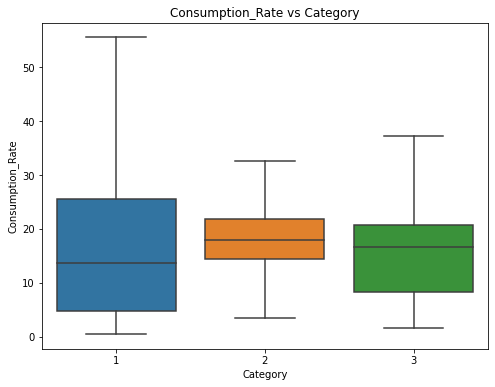

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Consumption_Rate',data=data,showfliers=False)
plt.ylabel("Consumption_Rate")
plt.title("Consumption_Rate vs Category")

Text(0.5, 1.0, 'Reach_Rate vs Category')

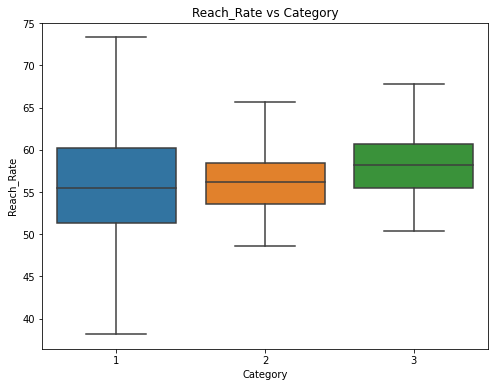

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Reach_Rate',data=data, showfliers=False)

plt.ylabel("Reach_Rate")
plt.title("Reach_Rate vs Category")

Text(0.5, 1.0, 'Posts Frequency vs Category')

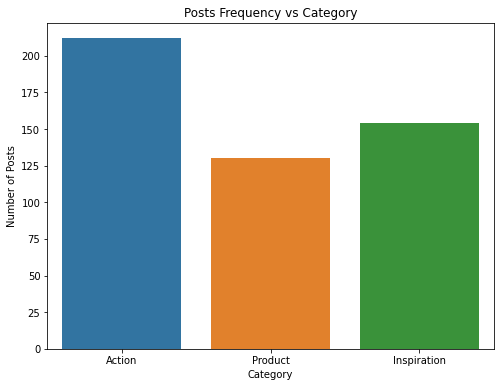

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(data["Category"])
plt.ylabel("Number of Posts")
plt.xlabel("Category")
plt.xticks(np.arange(0,3),["Action", "Product", "Inspiration"])
plt.title("Posts Frequency vs Category")

### Skewness

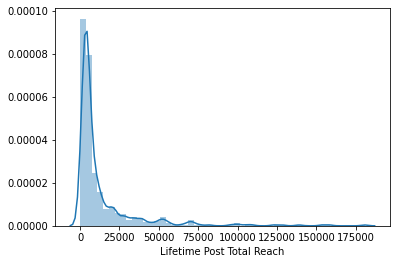

In [36]:
sns.distplot(data['Lifetime Post Total Reach'])

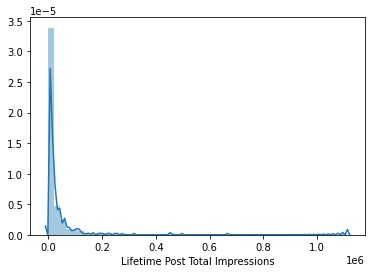

In [37]:
sns.distplot(data['Lifetime Post Total Impressions'])

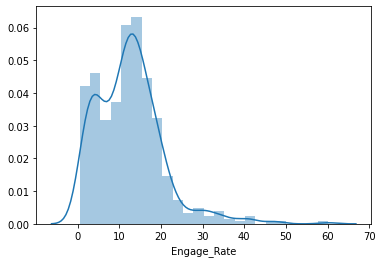

In [38]:
sns.distplot(data['Engage_Rate'])

In [39]:
data.skew()

Page total likes                                                      -1.000131
Category                                                              0.225770 
Post Month                                                            -0.120848
Post Weekday                                                          -0.095459
Post Hour                                                             0.219314 
Paid                                                                  0.992792 
Lifetime Post Total Reach                                             3.773933 
Lifetime Post Total Impressions                                       8.318915 
Lifetime Engaged Users                                                4.596111 
Lifetime Post Consumers                                               5.127528 
Lifetime Post Consumptions                                            4.835546 
Lifetime Post Impressions by people who have liked your Page          14.698773
Lifetime Post reach by people who like y

We can see that all the target columns are highly skewed.

Applying Log Tranformation Log(x+1) to all the target columns.

In [40]:
Log_trans_columns=data.columns[7:]

In [41]:
data[Log_trans_columns]=data[Log_trans_columns].applymap(lambda x: np.log(x+1))

In [42]:
data['Post Hour'] = data["Post Hour"].astype(str)
data['Post Weekday'] = data["Post Weekday"].astype(str)
data['Post Month'] = data["Post Month"].astype(str)

In [43]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Reach_Rate,Reach_Rate_by_liked_users,Engage_Rate,Engage_Rate_by_liked_users,Consumer_Rate,Consumption_Rate,Avg_Consumption_Rate,Impressions_100,Impression_rate_by_liked
0,139441,Photo,2,12,4,3,0,7.920447,8.535426,5.187386,4.700480,5.075174,8.032360,7.403061,4.787492,1.609438,4.382027,2.890372,4.615121,4.008354,3.994181,2.010630,2.110952,1.601558,1.913625,0.899639,3.949511,1.165456
1,139441,Status,2,12,3,10,0,9.255409,9.855242,7.284821,7.216709,7.423568,9.368284,8.718173,7.011214,1.791759,4.875197,3.401197,5.105945,4.023349,3.973959,2.703323,2.951167,2.639876,2.833438,0.801992,5.255253,2.240477
2,139441,Photo,3,12,3,3,0,7.789040,8.383433,5.181784,4.736198,5.043425,7.942007,7.315884,4.890349,0.000000,4.204693,2.708050,4.394449,4.028552,3.997274,2.120496,2.280588,1.737474,1.999058,0.859861,3.800644,1.104138
3,139441,Photo,2,12,2,10,1,10.822355,11.385001,7.701652,6.673298,7.021084,11.019088,10.375021,7.234898,4.077537,7.360740,4.997212,7.483244,4.059916,3.979952,1.688380,1.672368,0.946224,1.173189,0.882302,6.780955,3.801437
4,139441,Photo,2,12,2,3,0,8.888067,9.517457,6.510258,6.018593,6.364751,8.736971,8.071219,5.983936,2.995732,5.786897,3.912023,5.976351,3.994307,3.958541,2.328529,2.593387,1.896098,2.197961,0.881548,4.919543,1.698621


### Modelling

Here we are using different ensemble models and checking the metrics RMSE and MAE.

The models used are GradientBoostingRegressor, RandomForestRegressor, SVR.

We can choose the model based on RMSE and MAE.

We will train models by choosing one target variable at time.

Totally, we will test these models on 12 Target variables given plus the 9 derived Target Variables.

In [44]:
table_column_names = ["Target", "Model", "MAE", "RMSE", "Actual_MAE", "Actual_RMSE"]
performance_table = pd.DataFrame(columns = table_column_names)

In [45]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Reach_Rate,Reach_Rate_by_liked_users,Engage_Rate,Engage_Rate_by_liked_users,Consumer_Rate,Consumption_Rate,Avg_Consumption_Rate,Impressions_100,Impression_rate_by_liked
0,139441,Photo,2,12,4,3,0,7.920447,8.535426,5.187386,4.700480,5.075174,8.032360,7.403061,4.787492,1.609438,4.382027,2.890372,4.615121,4.008354,3.994181,2.010630,2.110952,1.601558,1.913625,0.899639,3.949511,1.165456
1,139441,Status,2,12,3,10,0,9.255409,9.855242,7.284821,7.216709,7.423568,9.368284,8.718173,7.011214,1.791759,4.875197,3.401197,5.105945,4.023349,3.973959,2.703323,2.951167,2.639876,2.833438,0.801992,5.255253,2.240477
2,139441,Photo,3,12,3,3,0,7.789040,8.383433,5.181784,4.736198,5.043425,7.942007,7.315884,4.890349,0.000000,4.204693,2.708050,4.394449,4.028552,3.997274,2.120496,2.280588,1.737474,1.999058,0.859861,3.800644,1.104138
3,139441,Photo,2,12,2,10,1,10.822355,11.385001,7.701652,6.673298,7.021084,11.019088,10.375021,7.234898,4.077537,7.360740,4.997212,7.483244,4.059916,3.979952,1.688380,1.672368,0.946224,1.173189,0.882302,6.780955,3.801437
4,139441,Photo,2,12,2,3,0,8.888067,9.517457,6.510258,6.018593,6.364751,8.736971,8.071219,5.983936,2.995732,5.786897,3.912023,5.976351,3.994307,3.958541,2.328529,2.593387,1.896098,2.197961,0.881548,4.919543,1.698621


In [46]:
def all_model(data):
  table_column_names = ["Target", "Model", "MAE", "RMSE", "Actual_MAE", "Actual_RMSE"]
  performance_table = pd.DataFrame(columns = table_column_names)
  for target in data.columns[7:]:
    OC=np.percentile(data[target],80)
    
    #Removing the possible outliers
    temp=data[data[target] < OC][:]
    X=temp.iloc[:,:7]
    X=pd.get_dummies(X)
    Y=temp[target]
    #Splitting the data
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 101)
    #Normalizing the Data
    norm = MinMaxScaler().fit(X_Train)
    X_Train_norm = norm.transform(X_Train)
    X_Test_norm = norm.transform(X_Test)
    #Trainging the Models
    model1 = GradientBoostingRegressor().fit(X_Train_norm,Y_Train)
    model2 = RandomForestRegressor().fit(X_Train_norm,Y_Train)
    model3 =SVR(kernel = 'rbf', gamma='auto').fit(X_Train_norm,Y_Train)
    
    Y_pred1=model1.predict(X_Test_norm)
    Y_pred2=model2.predict(X_Test_norm)
    Y_pred3=model3.predict(X_Test_norm)

    lrmae=mean_absolute_error(Y_Test, Y_pred1)
    rfmae=mean_absolute_error(Y_Test, Y_pred2)
    svrmae=mean_absolute_error(Y_Test, Y_pred3)
    
    elrmae=mean_absolute_error(np.exp(Y_Test)-1, np.exp(Y_pred1)-1)
    erfmae=mean_absolute_error(np.exp(Y_Test)-1, np.exp(Y_pred2)-1)
    esvrmae=mean_absolute_error(np.exp(Y_Test)-1, np.exp(Y_pred3)-1)

    lrrmse=mean_squared_error(Y_Test, Y_pred1,squared=False)
    rfrmse=mean_squared_error(Y_Test, Y_pred2,squared=False)
    svrrmse=mean_squared_error(Y_Test, Y_pred3,squared=False)

    elrrmse=mean_squared_error(np.exp(Y_Test)-1, np.exp(Y_pred1)-1,squared=False)
    erfrmse=mean_squared_error(np.exp(Y_Test)-1, np.exp(Y_pred2)-1,squared=False)
    esvrrmse=mean_squared_error(np.exp(Y_Test)-1, np.exp(Y_pred3)-1,squared=False)

    performance_table = performance_table.append({'Target': target,'Model': "GradientBoostingRegressor", "MAE":lrmae, "RMSE":lrrmse, "Actual_MAE":elrmae, "Actual_RMSE":elrrmse}, ignore_index=True)
    performance_table = performance_table.append({'Target': target,'Model': "RandomForestRegressor", "MAE":rfmae, "RMSE":rfrmse,"Actual_MAE":erfmae, "Actual_RMSE":erfrmse}, ignore_index=True)
    performance_table = performance_table.append({'Target': target,'Model': "SVR", "MAE":svrmae, "RMSE":svrrmse,"Actual_MAE":esvrmae, "Actual_RMSE":esvrrmse}, ignore_index=True)
  return (performance_table)

In [47]:
result=all_model(data)

In [48]:
result.groupby(['Target', 'Model']).first() 

MAE  ...  Actual_RMSE
Target                                                              Model                               ...             
Avg_Consumption_Rate                                                GradientBoostingRegressor 0.038568  ... 0.112396    
                                                                    RandomForestRegressor     0.035196  ... 0.103269    
                                                                    SVR                       0.042383  ... 0.121194    
Consumer_Rate                                                       GradientBoostingRegressor 0.435672  ... 4.246628    
                                                                    RandomForestRegressor     0.425022  ... 4.199166    
                                                                    SVR                       0.429297  ... 3.965950    
Consumption_Rate                                                    GradientBoostingRegressor 0.455626  ... 6.646960    
                                                                    RandomForestRegressor     0.455918  ... 6.675331    
                                                                    SVR                       0.421474  ... 5.607586    
Engage_Rate                                                         GradientBoostingRegressor 0.382399  ... 4.256482    
                                                                    RandomForestRegressor     0.390189  ... 4.324507    
                                                                    SVR                       0.384660  ... 4.238546    
Engage_Rate_by_liked_users                                          GradientBoostingRegressor 0.319767  ... 3.905260    
                                                                    RandomForestRegressor     0.315568  ... 3.719334    
                                                                    SVR                       0.319496  ... 3.767930    
Impression_rate_by_liked                                            GradientBoostingRegressor 0.346090  ... 2.695766    
                                                                    RandomForestRegressor     0.313889  ... 2.562272    
                                                                    SVR                       0.328226  ... 2.606553    
Impressions_100                                                     GradientBoostingRegressor 0.373725  ... 47.309032   
                                                                    RandomForestRegressor     0.362033  ... 47.252267   
                                                                    SVR                       0.431122  ... 49.863873   
Lifetime Engaged Users                                              GradientBoostingRegressor 0.418795  ... 257.921541  
                                                                    RandomForestRegressor     0.442442  ... 259.317513  
                                                                    SVR                       0.427974  ... 252.275004  
Lifetime People who have liked your Page and engaged with your post GradientBoostingRegressor 0.376871  ... 151.855825  
                                                                    RandomForestRegressor     0.365512  ... 154.711856  
                                                                    SVR                       0.302284  ... 145.946676  
Lifetime Post Consumers                                             GradientBoostingRegressor 0.371412  ... 209.918921  
                                                                    RandomForestRegressor     0.344172  ... 201.230691  
                                                                    SVR                       0.356852  ... 207.532894  
Lifetime Post Consumptions                                          GradientBoostingRegressor 0.421875  ... 353.285490  
                                                                    RandomForestRegressor     0.389139  ..

### From the above Table we can see that that newly added derived Metrics got very good RMSE Value Compared to other Metrics. 

Hence depending on the requirement we can select the metrics and predict the engagement_rate, reach_rate, consumer_rate, consumption_rate.

By preciting the Metric we will get an understanding of how much reach the post will be getting, based on the given input variables.

### Future Scope

We can further improve the model by extracting more information about the post like text of post, comments, etc. which can be used to perform sentiment analysis. 

Based in the sentiment of the comments we can also find out the customer satisfaction, sentiement. 

Bagging can be used to find each metric individually and then use aggregation to find other target variables.